In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('titanic_numeric.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_count
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [20]:
features = dataset.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                   test_size=0.4, random_state=234)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                   test_size=0.5, random_state=234)

In [21]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_count
673,2,1,31.0,0,0,13.0000,147,2,31.0,3,13.0000,1.670278,11,0,0
869,3,1,4.0,1,1,11.1333,147,2,4.0,3,11.1333,1.619291,7,0,2
9,2,0,14.0,1,0,30.0708,147,0,14.0,0,30.0708,1.975282,12,0,1
851,3,1,74.0,0,0,7.7750,147,2,65.0,3,7.7750,1.507093,11,0,0
329,1,0,16.0,0,1,57.9792,17,0,16.0,0,57.9792,2.252446,8,1,1


In [22]:
for data in [y_train, y_val, y_test]:
    print(round(len(data) / len(labels), 2))

0.6
0.2
0.2


#### Features scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
features = X_train.columns

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features] = scaler.transform(X_train[features])
X_val_scaled[features] = scaler.transform(X_val[features])
X_test_scaled[features] = scaler.transform(X_test[features])

X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_count
673,-0.371195,0.716064,0.100522,-0.442893,-0.464870,-0.360763,0.448814,0.576755,0.115829,0.562157,-0.419405,-0.280131,0.428018,-0.535488,-0.539757
869,0.830128,0.716064,-1.756374,0.446223,0.764045,-0.395744,0.448814,0.576755,-1.987539,0.562157,-0.463648,-0.396176,-1.774984,-0.535488,0.691996
9,-0.371195,-1.396523,-1.068635,0.446223,-0.464870,-0.040859,0.448814,-1.958118,-1.208514,-2.033160,-0.014807,0.414044,0.978768,-0.535488,0.076120
851,0.830128,0.716064,3.057802,-0.442893,-0.464870,-0.458678,0.448814,0.576755,2.764514,0.562157,-0.543244,-0.651532,0.428018,-0.535488,-0.539757
329,-1.572519,-1.396523,-0.931087,-0.442893,0.764045,0.482139,-3.230092,-1.958118,-1.052709,-2.033160,0.646656,1.044859,-1.224234,1.867457,0.076120


In [29]:
print(X_train_scaled.Sex.min(), X_train_scaled.Sex.max())

-1.39652291176834 0.7160641558925483


In [78]:
# Define the list of features to be used for each dataset
raw_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch',
                        'Fare', 'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch',
                        'Fare_clean', 'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch',
                'Fare_clean', 'Fare_clean_tr', 'Cabin', 'Cabin_ind',
                'Embarked_clean', 'Title', 'Family_count']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_count',
                    'Fare_clean_tr', 'Cabin_ind', 'Title']

#### Build and train the models with the different list of features

In [79]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

<AxesSubplot:>

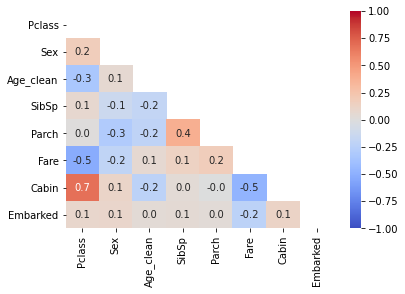

In [80]:
matrix = np.triu(X_train[raw_original_features].corr())
sns.heatmap(X_train[raw_original_features].corr(), annot=True, fmt='.1f',
           vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### GridSearchCV

In [81]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))
    

In [82]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(534,)
(178,)
(179,)


In [83]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3,10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train[raw_original_features], y_train)

print_results(cv)

Best Params: {'max_depth': 8, 'n_estimators': 512}

0.775 (+/-0.117) for {'max_depth': 2, 'n_estimators': 8}
0.775 (+/-0.085) for {'max_depth': 2, 'n_estimators': 16}
0.803 (+/-0.095) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.085) for {'max_depth': 2, 'n_estimators': 64}
0.794 (+/-0.07) for {'max_depth': 2, 'n_estimators': 128}
0.8 (+/-0.083) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/-0.075) for {'max_depth': 2, 'n_estimators': 512}
0.835 (+/-0.06) for {'max_depth': 4, 'n_estimators': 8}
0.822 (+/-0.081) for {'max_depth': 4, 'n_estimators': 16}
0.83 (+/-0.075) for {'max_depth': 4, 'n_estimators': 32}
0.832 (+/-0.084) for {'max_depth': 4, 'n_estimators': 64}
0.832 (+/-0.1) for {'max_depth': 4, 'n_estimators': 128}
0.839 (+/-0.076) for {'max_depth': 4, 'n_estimators': 256}
0.83 (+/-0.086) for {'max_depth': 4, 'n_estimators': 512}
0.839 (+/-0.05) for {'max_depth': 8, 'n_estimators': 8}
0.843 (+/-0.046) for {'max_depth': 8, 'n_estimators': 16}
0.835 (+/-0.058) for {'max_

#### Feature Importance

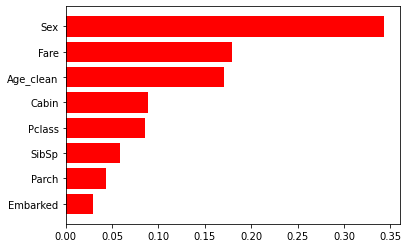

In [84]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [raw_original_features[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

## Cleaned original feature model

<AxesSubplot:>

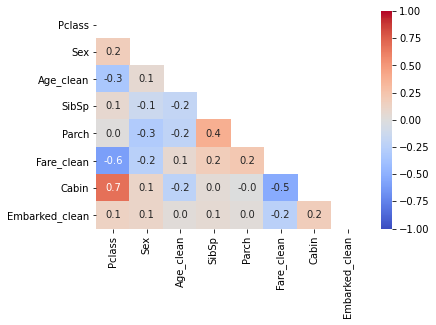

In [85]:
matrix = np.triu(X_train[cleaned_original_features].corr())
sns.heatmap(X_train[cleaned_original_features].corr(), annot=True, fmt='.1f',
           vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [86]:
rf_clean_original_feat = RandomForestClassifier()
cv_clean_original_feat = GridSearchCV(rf_clean_original_feat, parameters, cv=5)
cv_clean_original_feat.fit(X_train[cleaned_original_features], y_train)

print_results(cv_clean_original_feat)

Best Params: {'max_depth': 8, 'n_estimators': 128}

0.79 (+/-0.074) for {'max_depth': 2, 'n_estimators': 8}
0.783 (+/-0.083) for {'max_depth': 2, 'n_estimators': 16}
0.792 (+/-0.103) for {'max_depth': 2, 'n_estimators': 32}
0.805 (+/-0.081) for {'max_depth': 2, 'n_estimators': 64}
0.803 (+/-0.057) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.07) for {'max_depth': 2, 'n_estimators': 256}
0.788 (+/-0.076) for {'max_depth': 2, 'n_estimators': 512}
0.818 (+/-0.056) for {'max_depth': 4, 'n_estimators': 8}
0.805 (+/-0.1) for {'max_depth': 4, 'n_estimators': 16}
0.818 (+/-0.075) for {'max_depth': 4, 'n_estimators': 32}
0.835 (+/-0.086) for {'max_depth': 4, 'n_estimators': 64}
0.837 (+/-0.072) for {'max_depth': 4, 'n_estimators': 128}
0.837 (+/-0.069) for {'max_depth': 4, 'n_estimators': 256}
0.837 (+/-0.091) for {'max_depth': 4, 'n_estimators': 512}
0.824 (+/-0.065) for {'max_depth': 8, 'n_estimators': 8}
0.837 (+/-0.057) for {'max_depth': 8, 'n_estimators': 16}
0.833 (+/-0.044) for 

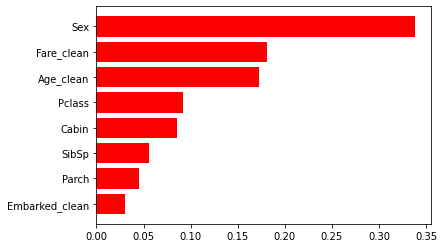

In [87]:
# Generate feature importance plot
feat_imp_clean_original_feat = cv_clean_original_feat.best_estimator_.feature_importances_
indices = np.argsort(feat_imp_clean_original_feat)
plt.yticks(range(len(indices)), [cleaned_original_features[i] for i in indices])
plt.barh(range(len(indices)), feat_imp_clean_original_feat[indices], color='r', align='center')
plt.show()

## All features model

<AxesSubplot:>

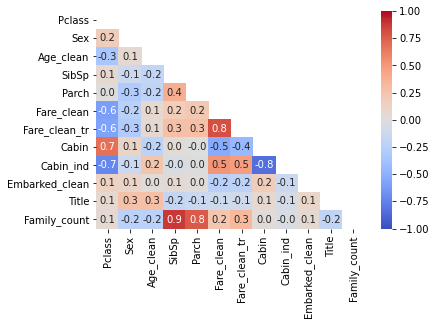

In [88]:
matrix = np.triu(X_train[all_features].corr())
sns.heatmap(X_train[all_features].corr(), annot=True, fmt='.1f',
           vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [89]:
rf_all_features = RandomForestClassifier()
cv_all_features = GridSearchCV(rf_all_features, parameters, cv=5)
cv_all_features.fit(X_train[all_features], y_train)

print_results(cv_all_features)

Best Params: {'max_depth': 4, 'n_estimators': 128}

0.805 (+/-0.06) for {'max_depth': 2, 'n_estimators': 8}
0.802 (+/-0.075) for {'max_depth': 2, 'n_estimators': 16}
0.805 (+/-0.044) for {'max_depth': 2, 'n_estimators': 32}
0.811 (+/-0.049) for {'max_depth': 2, 'n_estimators': 64}
0.822 (+/-0.056) for {'max_depth': 2, 'n_estimators': 128}
0.822 (+/-0.042) for {'max_depth': 2, 'n_estimators': 256}
0.815 (+/-0.06) for {'max_depth': 2, 'n_estimators': 512}
0.832 (+/-0.072) for {'max_depth': 4, 'n_estimators': 8}
0.839 (+/-0.068) for {'max_depth': 4, 'n_estimators': 16}
0.845 (+/-0.059) for {'max_depth': 4, 'n_estimators': 32}
0.843 (+/-0.064) for {'max_depth': 4, 'n_estimators': 64}
0.85 (+/-0.067) for {'max_depth': 4, 'n_estimators': 128}
0.848 (+/-0.062) for {'max_depth': 4, 'n_estimators': 256}
0.845 (+/-0.056) for {'max_depth': 4, 'n_estimators': 512}
0.835 (+/-0.038) for {'max_depth': 8, 'n_estimators': 8}
0.843 (+/-0.064) for {'max_depth': 8, 'n_estimators': 16}
0.841 (+/-0.04) for 

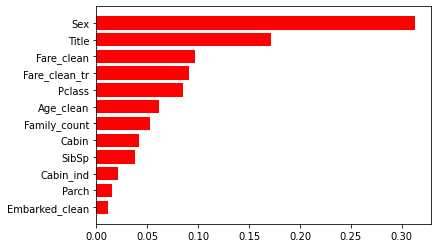

In [90]:
# Generate feature importance plot
feat_imp_all_features = cv_all_features.best_estimator_.feature_importances_
indices = np.argsort(feat_imp_all_features)
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.barh(range(len(indices)), feat_imp_all_features[indices], color='r', align='center')
plt.show()

## Reduced features

<AxesSubplot:>

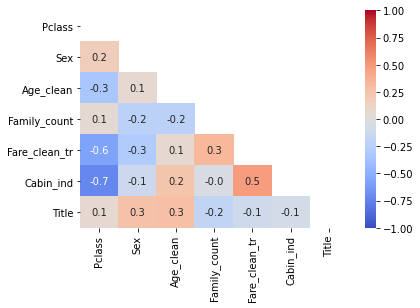

In [91]:
matrix = np.triu(X_train[reduced_features].corr())
sns.heatmap(X_train[reduced_features].corr(), annot=True, fmt='.1f',
           vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [92]:
rf_reduced_features = RandomForestClassifier()
cv_reduced_features = GridSearchCV(rf_reduced_features, parameters, cv=5)
cv_reduced_features.fit(X_train[reduced_features], y_train)

print_results(cv_reduced_features)

Best Params: {'max_depth': 4, 'n_estimators': 64}

0.803 (+/-0.085) for {'max_depth': 2, 'n_estimators': 8}
0.816 (+/-0.038) for {'max_depth': 2, 'n_estimators': 16}
0.813 (+/-0.051) for {'max_depth': 2, 'n_estimators': 32}
0.811 (+/-0.099) for {'max_depth': 2, 'n_estimators': 64}
0.807 (+/-0.045) for {'max_depth': 2, 'n_estimators': 128}
0.813 (+/-0.048) for {'max_depth': 2, 'n_estimators': 256}
0.813 (+/-0.045) for {'max_depth': 2, 'n_estimators': 512}
0.839 (+/-0.067) for {'max_depth': 4, 'n_estimators': 8}
0.847 (+/-0.067) for {'max_depth': 4, 'n_estimators': 16}
0.847 (+/-0.06) for {'max_depth': 4, 'n_estimators': 32}
0.852 (+/-0.076) for {'max_depth': 4, 'n_estimators': 64}
0.847 (+/-0.069) for {'max_depth': 4, 'n_estimators': 128}
0.852 (+/-0.072) for {'max_depth': 4, 'n_estimators': 256}
0.85 (+/-0.075) for {'max_depth': 4, 'n_estimators': 512}
0.846 (+/-0.038) for {'max_depth': 8, 'n_estimators': 8}
0.848 (+/-0.029) for {'max_depth': 8, 'n_estimators': 16}
0.846 (+/-0.045) for

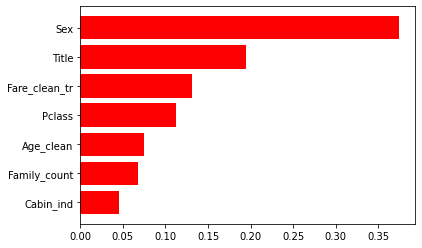

In [93]:
# Generate feature importance plot
feat_imp_reduced_features = cv_reduced_features.best_estimator_.feature_importances_
indices = np.argsort(feat_imp_reduced_features)
plt.yticks(range(len(indices)), [reduced_features[i] for i in indices])
plt.barh(range(len(indices)), feat_imp_reduced_features[indices], color='r', align='center')
plt.show()

## Evaluate all models on unseen data

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

mod_list = [cv.best_estimator_, cv_clean_original_feat.best_estimator_,
           cv_all_features.best_estimator_, cv_reduced_features.best_estimator_]
model_names = ['raw_original', 'cleaned_original', 'all', 'reduced']
models = {}

for name, mdl in zip(model_names, mod_list):
    models[name] = mdl

In [95]:
print(models)

{'raw_original': RandomForestClassifier(max_depth=8, n_estimators=512), 'cleaned_original': RandomForestClassifier(max_depth=8, n_estimators=128), 'all': RandomForestClassifier(max_depth=4, n_estimators=128), 'reduced': RandomForestClassifier(max_depth=4, n_estimators=64)}


In [96]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    acc = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(
    name, acc, precision, recall, round((end - start), 3)))

#### Validation Set

In [97]:
evaluate_model('Raw Features', models['raw_original'],
               X_val[raw_original_features], y_val)
evaluate_model('Cleaned Features', models['cleaned_original'],
               X_val[cleaned_original_features], y_val)
evaluate_model('All Features', models['all'],
               X_val[all_features], y_val)
evaluate_model('Reduced Features', models['reduced'],
               X_val[reduced_features], y_val)

Raw Features -- 	Accuracy: 0.803 / Precision: 0.812 / Recall: 0.693 / Latency: 0.188ms
Cleaned Features -- 	Accuracy: 0.775 / Precision: 0.761 / Recall: 0.68 / Latency: 0.035ms
All Features -- 	Accuracy: 0.764 / Precision: 0.726 / Recall: 0.707 / Latency: 0.028ms
Reduced Features -- 	Accuracy: 0.803 / Precision: 0.803 / Recall: 0.707 / Latency: 0.012ms


#### Test Set

In [98]:
evaluate_model('Raw Features', models['raw_original'],
               X_test[raw_original_features], y_test)
evaluate_model('Cleaned Features', models['cleaned_original'],
               X_test[cleaned_original_features], y_test)
evaluate_model('All Features', models['all'],
               X_test[all_features], y_test)
evaluate_model('Reduced Features', models['reduced'],
               X_test[reduced_features], y_test)

Raw Features -- 	Accuracy: 0.804 / Precision: 0.719 / Recall: 0.683 / Latency: 0.1ms
Cleaned Features -- 	Accuracy: 0.788 / Precision: 0.683 / Recall: 0.683 / Latency: 0.02ms
All Features -- 	Accuracy: 0.788 / Precision: 0.672 / Recall: 0.717 / Latency: 0.019ms
Reduced Features -- 	Accuracy: 0.788 / Precision: 0.683 / Recall: 0.683 / Latency: 0.011ms
